# Morpion Solitaire: exploration with a model

In [1]:
import sys
sys.path.append(sys.path[0] + '/../cpp/bin')

import PyMorpionSolitaire

In [2]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

In [4]:
# from multiprocess import Pool
# pool = Pool(10)

## Model

In [5]:
class ResNet(torch.nn.Module):
    def __init__(self, module):
        super().__init__()
        self.module = module

    def forward(self, inputs):
        return self.module(inputs) + inputs

In [6]:
net = torch.load('models/Rutherford-5.pt', map_location=device)
# net = torch.load('models/Rutherford.pt', map_location=device)
net.eval()

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3))
  (1): ReLU()
  (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (3): ReLU()
  (4): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
  (5): ReLU()
  (6): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
  (7): ReLU()
  (8): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
  (9): ReLU()
  (10): ResNet(
    (module): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (11): ResNet(
    (module): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


## Game

In [7]:
game = PyMorpionSolitaire.Game5T('c')

In [8]:
x = torch.tensor(game.getMoveImages()[:, 48:144, 48:144]).float().unsqueeze(1)

In [9]:
with torch.no_grad():
    y = net(x).data

In [10]:
n = 5.0 * y / (1.0 - y)
n

tensor([[4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686],
        [4.9686]])

In [11]:
y.argmax().item(), n.argmax().item()

(0, 0)

In [12]:
with torch.no_grad():
    while game.getNumberOfMoves() > 0:
        x = torch.tensor(game.getMoveImages()[:, 48:144, 48:144]).float().unsqueeze(1)
        y = net(x).data.squeeze(1)
        i = np.argmax(y).item()
        yi = y[i].item()
        ni = 5.0 * yi / (1.0 - yi)
        game.playByIndex(i)
        s = game.getScore()
        print("%3d %5.1f %5.1f" % (s, ni, s + ni))

  1   5.0   6.0
  2   5.0   7.0
  3   5.0   8.0
  4   5.0   9.0
  5   5.0  10.0
  6   5.0  11.0
  7   5.0  12.0
  8   5.0  13.0
  9   5.0  14.0
 10   5.0  15.0
 11   5.0  16.0
 12   5.0  17.0
 13   5.0  18.0
 14   5.0  19.0
 15   5.0  20.0
 16   5.0  21.0
 17   5.0  22.0
 18   5.0  23.0
 19   5.0  24.0
 20   5.0  25.0
 21   5.0  26.0
 22   5.0  27.0
 23   5.0  28.0
 24   5.0  29.0
 25   5.0  30.0
 26   5.0  31.0
 27   5.0  32.0
 28   5.0  33.0
 29   5.0  34.0
 30   5.0  35.0
 31   5.0  36.0
 32   5.0  37.0
 33   5.0  38.0
 34   5.0  39.0
 35   5.0  40.0
 36   5.0  41.0
 37   5.0  42.0
 38   5.0  43.0
 39   5.0  44.0
 40   5.0  45.0
 41   5.0  46.0
 42   5.0  47.0
 43   5.0  48.0
 44   5.0  49.0
 45   5.0  50.0
 46   5.0  51.0
 47   5.0  52.0
 48   5.0  53.0
 49   5.0  54.0
 50   5.0  55.0
 51   5.0  56.0
 52   5.0  57.0
 53   5.0  58.0
 54   5.0  59.0
 55   5.0  60.0
 56   5.0  61.0
 57   4.2  61.2
 58   3.1  61.1
 59   2.1  61.1
 60   1.0  61.0
 61  -0.0  61.0


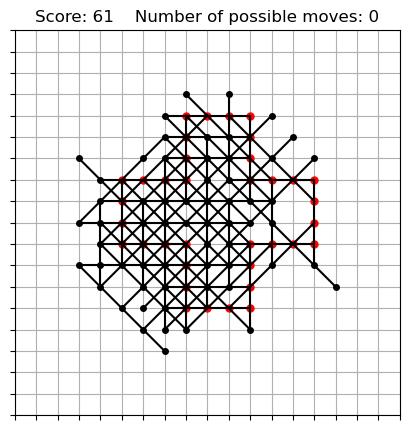

In [13]:
game.print()

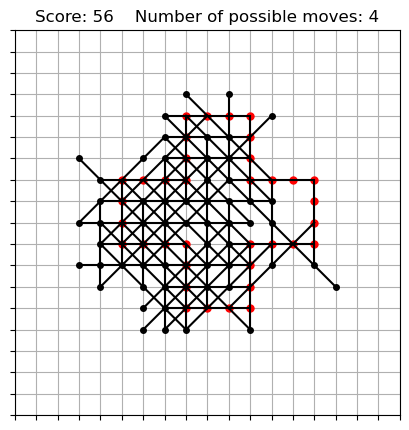

In [14]:
game.undo(5)
game.print()

In [13]:
def play(t):
    game = PyMorpionSolitaire.Game5T('c')
    while True:
        n = game.getNumberOfMoves()
        if n == 0:
            return game.getScore()
        if n == 1:
            game.playByIndex(0)
        else:
            x = torch.tensor(game.getMoveImages()[:, 48:144, 48:144]).float().unsqueeze(1)
            y = net(x).data.squeeze()
            n = 20.0 * y / (1.0 - y)
            delta_n = n - n.max()
            p = torch.exp(delta_n / t)
            p /= p.sum()
            index = np.random.choice(range(len(p)), p=np.array(p))
            game.playByIndex(index)

In [14]:
def play_repeated(t, n):
    return [play(t) for _ in trange(n)]

In [15]:
# def play_parallel(t, n):
#     return pool.map(play, [t for _ in range(n)])

In [17]:
scores_1 = play_repeated(1.0, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [18]:
scores_2 = play_repeated(2.0, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
scores_4 = play_repeated(4.0, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [20]:
scores_8 = play_repeated(8.0, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
scores_05 = play_repeated(0.5, 100)

  0%|          | 0/200 [00:00<?, ?it/s]

In [22]:
scores_025 = play_repeated(0.25, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [91]:
scores_0125 = play_repeated(0.125, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
def play_random():
    game = PyMorpionSolitaire.Game5T('c')
    game.playAtRandom()
    return game.getScore()

In [24]:
scores_0 = [play_random() for _ in trange(100000)]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [92]:
np.mean(scores_0), np.mean(scores_0125), np.mean(scores_025), np.mean(scores_05), \
np.mean(scores_1), np.mean(scores_2), np.mean(scores_4), np.mean(scores_8)

(53.61484, 70.76, 70.75, 70.555, 65.83, 63.42, 61.6, 60.17)

In [93]:
np.max(scores_0), np.mean(scores_0125), np.max(scores_025), np.max(scores_05), \
np.max(scores_1), np.max(scores_2), np.max(scores_4), np.max(scores_8)

(90, 70.76, 87, 86, 85, 80, 85, 79)

In [27]:
bins = [i - 0.5 for i in range(100)]

In [101]:
scores_05 = scores_05 + play_repeated(0.5, 400)

  0%|          | 0/100 [00:00<?, ?it/s]

In [102]:
len(scores_05)

500

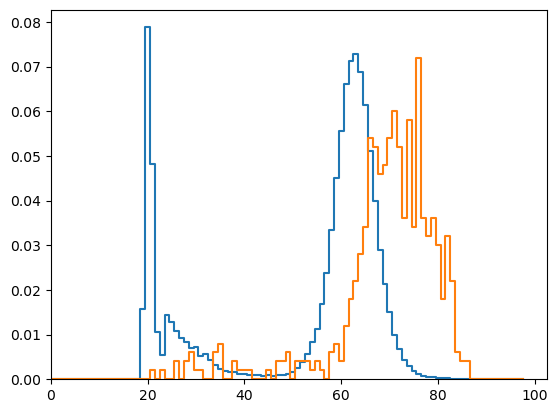

In [103]:
dist_0, bins = np.histogram(scores_0, bins, density=True)
dist, bins = np.histogram(scores_05, bins, density=True)

plt.step(bins[:-1], dist_0)
plt.step(bins[:-1], dist)
plt.xlim(0)
plt.ylim(0)
plt.show()